In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import glob
import PIL
from IPython.display import Image 

In [2]:
# This function:
# Loads the PNG image at the given path
# Decodes the PNG image to a uint8 W X H X 3 tensor
# Resizes the image to 224 x 224 x 3 tensor
# Returns the pre processed image as 224 x 224 x 3 tensor
#################################################
def load_img(path):

  # Reads the image file and returns data type of string
  img = tf.io.read_file(path)

  # Decodes the image to W x H x 3 shape tensor with type of uint8
  img = tf.io.decode_png(img, channels=3)

  # Resize the image to 224 x 244 x 3 shape tensor
  img = tf.image.resize_with_pad(img, 224, 224)

  # Converts the data type of uint8 to float32 by adding a new axis
  # This makes the img 1 x 224 x 224 x 3 tensor with the data type of float32
  # This is required for the mobilenet model we are using
  img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  return img

In [4]:
module_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 
module = hub.load(module_handle)
# Extract image features of the target image
target_img_path = '/content/drive/My Drive/Colab Notebooks/Inbody/data/1000072/20190905073849.png'
target_img = load_img(target_img_path)
target_img = module(target_img)
print("-----------------------------------------------------------------------------------------")
print("Extracing image features of the target image is done")

# Extract image features of the input image
i = 0
input_count = 0
input_imgs = []
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/Inbody/data/1000072/*.png'):
    i = i + 1

    print("-----------------------------------------------------------------------------------------")
    print("Image count                     :%s" %i)
    print("Image in process is             :%s" %filename)

    # Loads and pre-process the image
    img = load_img(filename)

    # Calculate the image feature vector of the img
    features = module(img)
    input_imgs.append([features, filename])
    input_count = input_count + 1
print("-----------------------------------------------------------------------------------------")
print("Extracting image features of the %d input images is done" %(input_count))


-----------------------------------------------------------------------------------------
Extracing image features of the target image is done
-----------------------------------------------------------------------------------------
Image count                     :1
Image in process is             :/content/drive/My Drive/Colab Notebooks/Inbody/data/1000072/20190905073849.png
-----------------------------------------------------------------------------------------
Image count                     :2
Image in process is             :/content/drive/My Drive/Colab Notebooks/Inbody/data/1000072/20190919125354.png
-----------------------------------------------------------------------------------------
Image count                     :3
Image in process is             :/content/drive/My Drive/Colab Notebooks/Inbody/data/1000072/20190905125532.png
-----------------------------------------------------------------------------------------
Image count                     :4
Image in process is  

Target Image



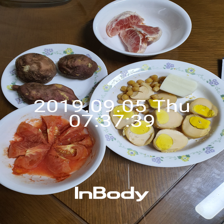



The 3 most similr images 



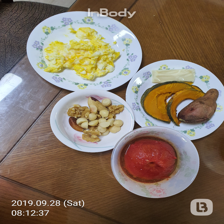

Similarity: -0.939



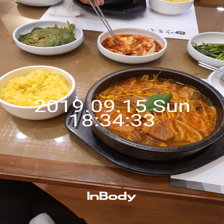

Similarity: -0.932



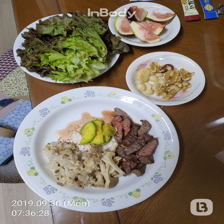

Similarity: -0.930



In [6]:
# display target_img
print("Target Image\n")
im = PIL.Image.open(target_img_path)
im = im.resize((224,224))
display(im)

# Calculate Cosine similarity between target_img and input_imgs
similarities = []
for i in range(0,input_count):
  similarity = tf.keras.losses.cosine_similarity(target_img, input_imgs[i][0])
  similarities.append([similarity,input_imgs[i][1]])

# display top 3 input_imgs which are the most similar with the target_img
similarities.sort()
print("\n\nThe 3 most similr images \n")
for s in range(1,4):
  im = PIL.Image.open(similarities[s][1])
  im = im.resize((224,224))
  display(im)
  print("Similarity: %.3f\n" %similarities[s][0])